# Lab 8: Define and Solve an ML Problem of Your Choosing

In [22]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [23]:
WHRDataSet_filename = os.path.expanduser("~/Downloads/data/WHR2018Chapter2OnlineData.csv")

df = pd.read_csv(WHRDataSet_filename)

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [24]:
print(list(df.columns))
print(df.info())
print(df.describe())

['country', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   country                                                   1562 non-null   object 
 1   year                                                      1562 non-null   

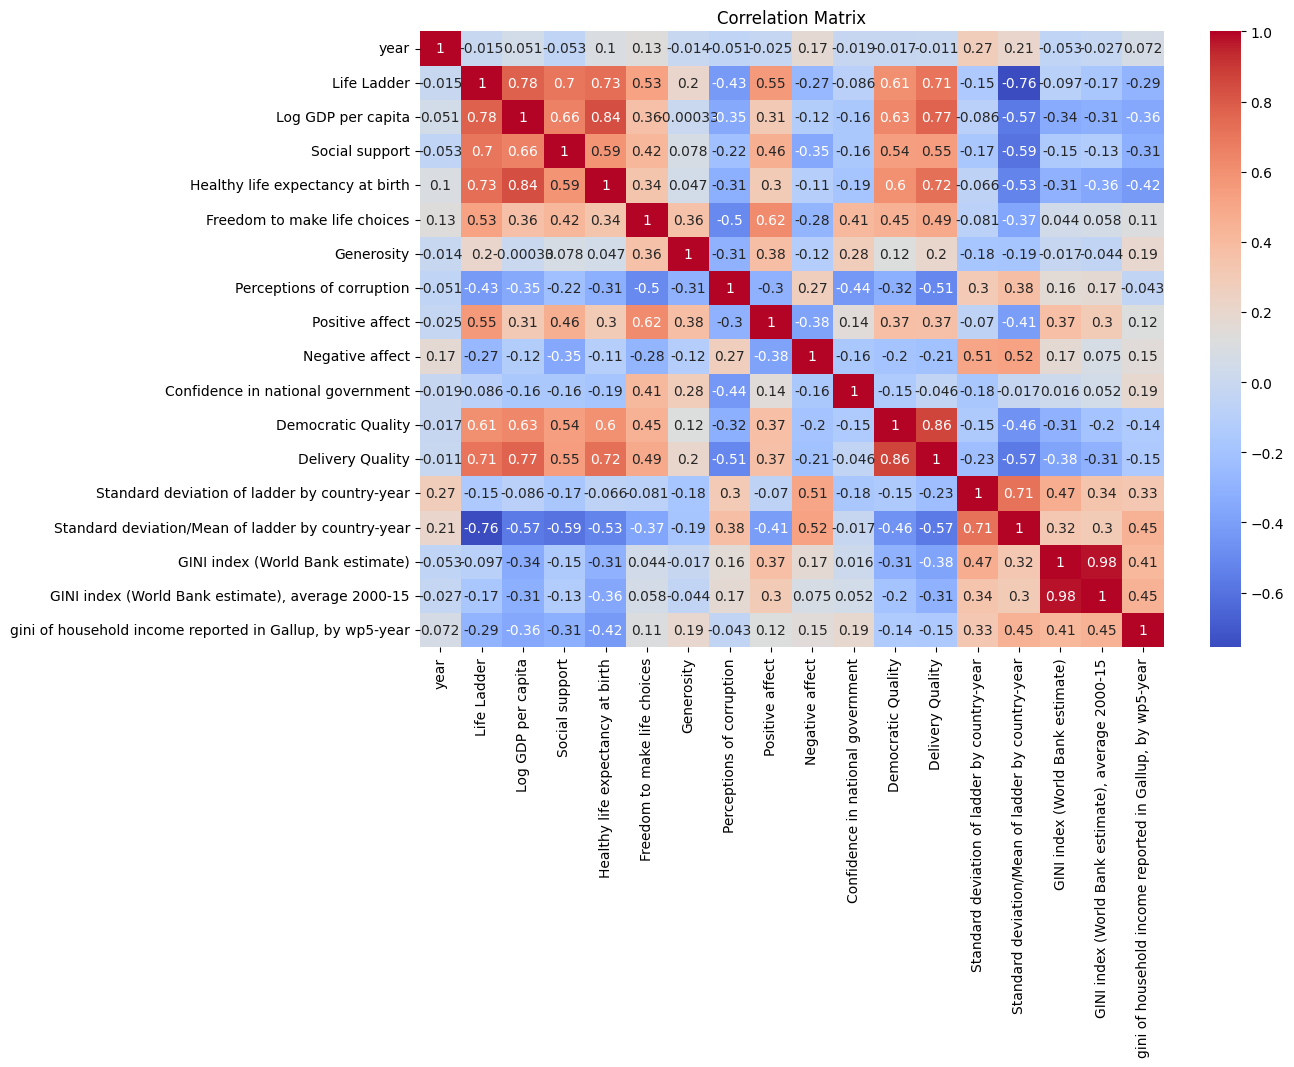

In [25]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. Dataset: World Happiness Report (WHR2018Chapter2OnlineData.csv)
2. I want to predict the "healthy life expectancy at birth" column
3. This is a supervised learning problem. Since we’re predicting a continuous value, it’s a regression problem.
4. Features might include 'Log GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'
5. Predicting healthy life expectancy at birth is important because it can give insights into a country’s overall health and well-being. For companies, especially those in healthcare or policy planning, having a model that can predict this can help in resource allocation, improving public health strategies, and identifying areas needing intervention to enhance quality of life.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [26]:
#check for missing values
missing_values = df.isnull().sum()
print(missing_values)

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [27]:
df = df.drop(columns=['year'])
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


In [28]:
from scipy.stats.mstats import winsorize

# Define the limits for Winsorization (e.g., 5% on both tails)
limits = (0.05, 0.05)

# Apply Winsorization to all numeric columns
for col in numeric_cols:
    df[col] = winsorize(df[col], limits=limits)

In [29]:
# One-hot encoding for categorical features (if any)
df = pd.get_dummies(df, drop_first=True)

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After looking at the data, I have decided to keep the following features for predicting healthy life expectancy at birth:
    - Log GDP per capita
    - Social support
    - Freedom to make life choices
    - Generosity
    - Perceptions of corruption
    - Positive affect
    - Negative affect
    - Confidence in national government
    - Democratic Quality
    - Delivery Quality

____  
I will remove features like:  
- year
- Standard deviation of ladder by country-year
- Standard deviation/mean of ladder by country-year
- GINI index (World Bank estimate)
- GINI index, average 2000-15
- gini of household income reported in Gallup

____
Data Preparation Techniques:  
- Handling Missing Data: Winsorization to deal with outliers and impute msising values using mean imputation
- Normalization: Scale all numerical features to have values between 0 and 1
- Feature Engineering: Create interaction terms if needed
- One-Hot Encoding


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [31]:
# Define features and label
X = df[['Log GDP per capita', 'Social support', 'Freedom to make life choices', 
        'Generosity', 'Perceptions of corruption', 'Positive affect', 
        'Negative affect', 'Confidence in national government', 
        'Democratic Quality', 'Delivery Quality']]
y = df['Healthy life expectancy at birth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
# Fit a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, lr_model.predict(X_train_scaled)))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_r2 = r2_score(y_train, lr_model.predict(X_train_scaled))
test_r2 = r2_score(y_test, y_pred)

print(f'Train RMSE: {train_rmse}, Test RMSE: {test_rmse}')
print(f'Train R2: {train_r2}, Test R2: {test_r2}')

Train RMSE: 3.8477165718548605, Test RMSE: 3.8663672065584898
Train R2: 0.7372733546637511, Test R2: 0.7357881381634515


In [33]:
# Use Random Forest with GridSearchCV for model selection
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Predict on test data
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the model
train_rmse_rf = np.sqrt(mean_squared_error(y_train, best_rf_model.predict(X_train_scaled)))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
train_r2_rf = r2_score(y_train, best_rf_model.predict(X_train_scaled))
test_r2_rf = r2_score(y_test, y_pred_rf)

print(f'Best Random Forest Model - Train RMSE: {train_rmse_rf}, Test RMSE: {test_rmse_rf}')
print(f'Best Random Forest Model - Train R2: {train_r2_rf}, Test R2: {test_r2_rf}')


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Random Forest Model - Train RMSE: 0.9233789969454812, Test RMSE: 2.2803086317123022
Best Random Forest Model - Train R2: 0.9848693370611447, Test R2: 0.9080962194910386


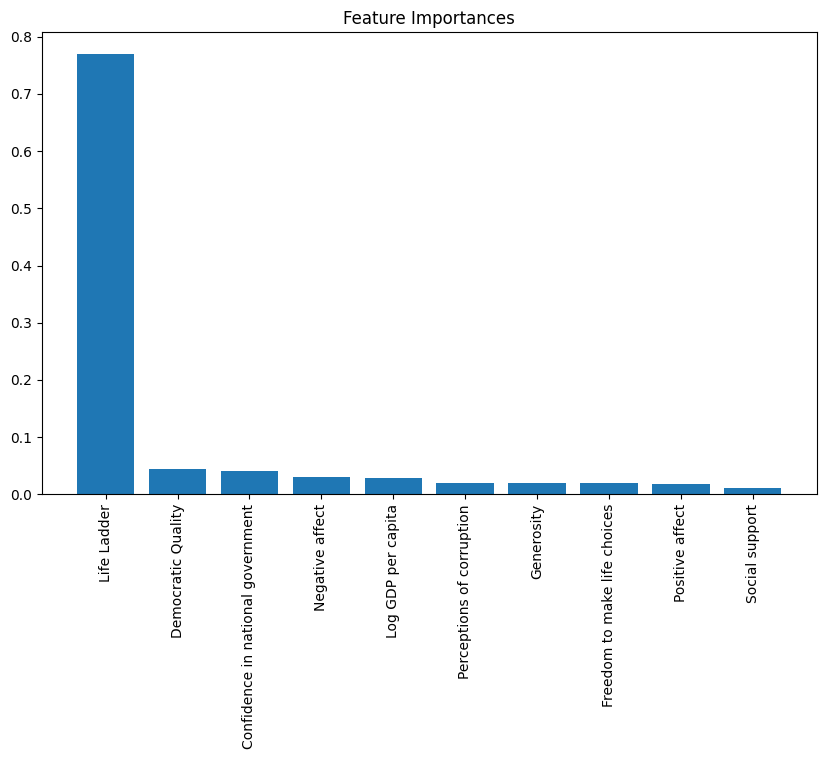

In [34]:
importances = best_rf_model.feature_importances_
features = df.columns.drop('Healthy life expectancy at birth')
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.show()


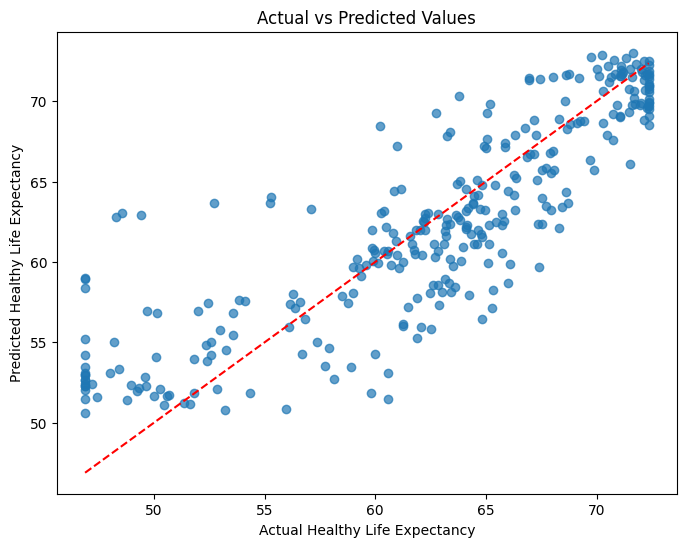

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Healthy Life Expectancy')
plt.ylabel('Predicted Healthy Life Expectancy')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()


## Results and Discussion

### Linear Regression Model
- **Train RMSE:** 3.8477, **Test RMSE:** 3.8664
  - The RMSE values are similar between training and testing, indicating a decent model fit, though the error magnitude suggests room for improvement.
- **Train R2:** 0.7373, **Test R2:** 0.7358
  - The model explains about 73% of the variance in the data, which is adequate but not optimal.

### Random Forest Model
- **Best Train RMSE:** 0.9234, **Best Test RMSE:** 2.2803
  - The Random Forest model shows a significant improvement in RMSE, especially on the test set, indicating better generalization.
- **Best Train R2:** 0.9849, **Best Test R2:** 0.9081
  - The model explains over 90% of the variance in the test data, indicating strong performance. The slight difference between Train and Test R2 suggests minimal overfitting.

The Random Forest model outperforms the linear model, demonstrating better prediction accuracy and variance explanation.


